# Form Feature Selection

In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt

from lib.segmentation import FormFeatureSelection

%matplotlib inline

In [2]:
from sklearn.decomposition import PCA

def plot_variance(features):
    var = np.var(selector.features, axis=0)
    plt.bar(np.arange(var.shape[0]), var, 0.5, color='black')
    plt.ylabel('Variance')
    
def plot_corrcoef(features):
    num_features = features.shape[1]
    corrcoef = np.corrcoef(features, rowvar=False)

    plt.pcolor(corrcoef)
    plt.colorbar()
    plt.yticks(np.arange(0.5, num_features + 0.5, 5), np.arange(0, num_features, 5))
    plt.xticks(np.arange(0.5, num_features + 0.5, 5), np.arange(0, num_features, 5))
    plt.show()
    
def plot_pca(features):
    pca = PCA()
    pca.fit(features)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.show()

## MNIST

In [3]:
from lib.datasets import MNIST
 
dataset = MNIST('../data/mnist').test

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


### SLIC

In [4]:
from lib.segmentation import slic_fixed

slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)

selector = FormFeatureSelection(dataset, slic, num_examples=1000)

print('Number of segments collected:', selector.features.shape[0])
print('Number of features collected:', selector.num_features)

>> Collecting features 100.00%
Number of segments collected: 65536
Number of features collected: 37


#### Plot variance, Pearson correlation and PCA

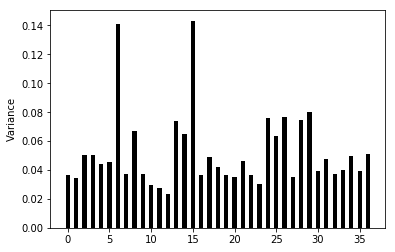

In [5]:
plot_variance(selector.features)

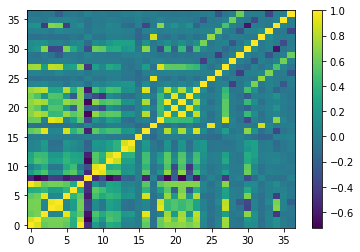

In [6]:
plot_corrcoef(selector.features)

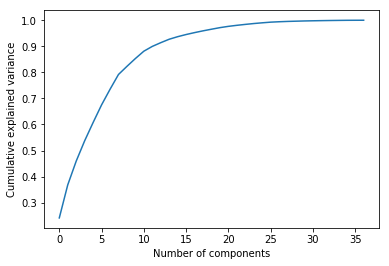

In [7]:
plot_pca(selector.features)

#### Removing features with low variance

In [8]:
print('Number of features before removing:', selector.num_features)
selector.remove_low_variance(0.04)
print('Number of features after removing:', selector.num_features)

Number of features before removing: 37
Number of features after removing: 21


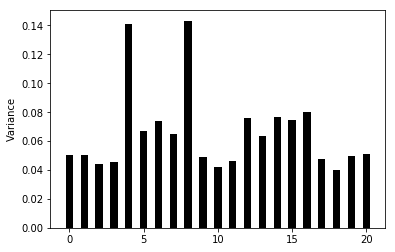

In [9]:
plot_variance(selector.features)

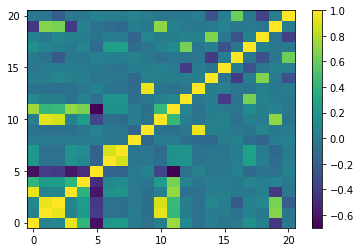

In [10]:
plot_corrcoef(selector.features)

#### Univariate feature selection

In [11]:
selector.select_univariate(12)

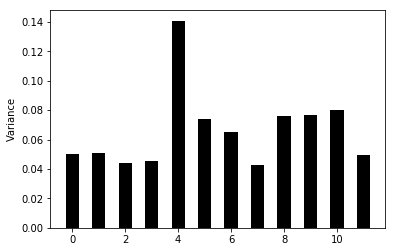

In [12]:
plot_variance(selector.features)

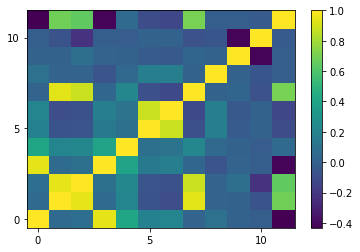

In [13]:
plot_corrcoef(selector.features)

#### Recursive feature elimination (RFE)

In [14]:
selector.eliminiate_recursive(9)

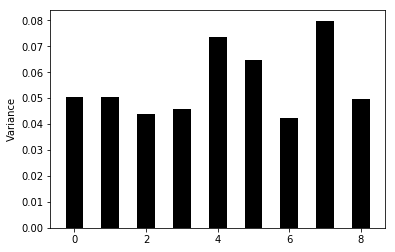

In [15]:
plot_variance(selector.features)

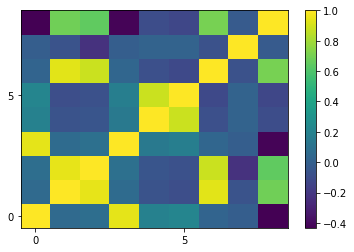

In [16]:
plot_corrcoef(selector.features)

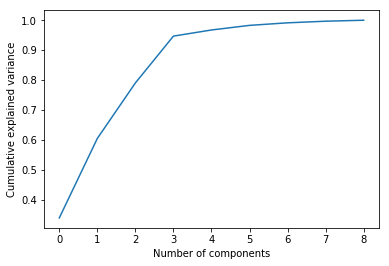

In [17]:
plot_pca(selector.features)

In [18]:
print(selector.selected_feature_indices)
print(selector.selected_features)

[ 2  3  4  5 13 14 18 29 34]
['bbox_height', 'bbox_width', 'centroid_x', 'centroid_y', 'hu_5', 'hu_6', 'inertia_tensor_20', 'mu_30', 'nu_20']


### Quickshift

In [19]:
from lib.segmentation import quickshift_fixed

quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)

selector = FormFeatureSelection(dataset, quickshift, num_examples=1000)

print('Number of segments collected:', selector.features.shape[0])
print('Number of features collected:', selector.num_features)

>> Collecting features 100.00%
Number of segments collected: 81095
Number of features collected: 37


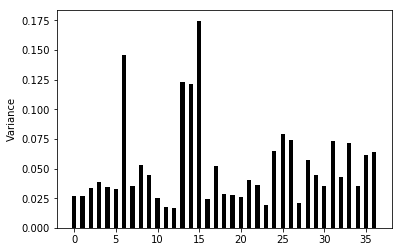

In [20]:
plot_variance(selector.features)

In [21]:
print('Number of features before removing:', selector.num_features)
selector.remove_low_variance(0.04)
print('Number of features after removing:', selector.num_features)

selector.select_univariate(12)
selector.eliminiate_recursive(9)

print(selector.selected_feature_indices)
print(selector.selected_features)

Number of features before removing: 37
Number of features after removing: 17
[17 24 25 26 28 29 31 33 36]
['inertia_tensor_11', 'mu_03', 'mu_11', 'mu_12', 'mu_21', 'mu_30', 'nu_03', 'nu_12', 'nu_30']


## PascalVOC

In [22]:
from lib.datasets import PascalVOC

NUM_EXAMPLES = 10
dataset = PascalVOC('../data/pascal_voc', num_examples=NUM_EXAMPLES, val_size=NUM_EXAMPLES).test

>> Reading ../data/pascal_voc/VOCdevkit/VOC2012 100.00%


### SLIC

In [23]:
from lib.segmentation import slic_fixed

slic = slic_fixed(num_segments=800, compactness=30, max_iterations=10, sigma=0)

selector = FormFeatureSelection(dataset, quickshift, num_examples=NUM_EXAMPLES)

print('Number of segments collected:', selector.features.shape[0])
print('Number of features collected:', selector.num_features)

>> Collecting features 100.00%
Number of segments collected: 784527
Number of features collected: 37


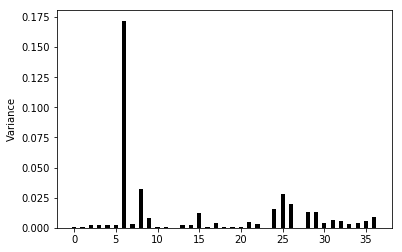

In [24]:
plot_variance(selector.features)

In [25]:
print('Number of features before removing:', selector.num_features)
selector.remove_low_variance(0.003)
print('Number of features after removing:', selector.num_features)

selector.select_univariate(12)
selector.eliminiate_recursive(9)

print(selector.selected_feature_indices)
print(selector.selected_features)

Number of features before removing: 37
Number of features after removing: 20
[15 21 24 25 26 28 29 31 36]
['hu_7', 'major_axis_length', 'mu_03', 'mu_11', 'mu_12', 'mu_21', 'mu_30', 'nu_03', 'nu_30']
